In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [17]:
X, y = mnist["data"].to_numpy(), mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


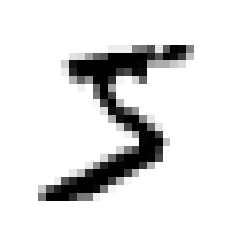

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [19]:
# y 값 확인
print(y[0])
y = y.astype(np.uint8)

5


In [20]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [21]:
# 5는 True고, 다른 숫자는 모두 False
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [23]:
from sklearn.linear_model import SGDClassifier

# 같은 결과를 얻고 싶다면 random_state의 값이 똑같아야함
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [24]:
sgd_clf.predict([some_digit])

array([ True])

In [26]:
# 5 분류기의 성능 평가
# StratifiedKFold는 클래스별 비율이 유지되도록 폴드를 만들기 위해
# 계층적 샘플링을 수행함, 매 반복에서 분류기 객체를 복제해 훈련 폴드로 훈련시키고
# 테스트 폴드로 예측을 만든다. 그런 다음 올바른 예측의 수를 세어 정확한 예측의 비율을 출력한다.
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [27]:
# cross_val_socre() 함수로 폴드가 3개인 K-Fold cross validation을 사용해
# SGDClassifier 모델의 평가 진행
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [28]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(x), 1), dtype=bool)